In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np 

import pandas as pd 

import matplotlib.pyplot as plt

import missingno as msno

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics 
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder

from xgboost import XGBClassifier

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ultimate-ufc-dataset/most-recent-event.csv
/kaggle/input/ultimate-ufc-dataset/ufc-master.csv
/kaggle/input/ultimate-ufc-dataset/upcoming-event.csv


# Import the data

In [2]:
recent_df = pd.read_csv("../input/ultimate-ufc-dataset/most-recent-event.csv")
master_df = pd.read_csv("../input/ultimate-ufc-dataset/ufc-master.csv")
upcoming_df = pd.read_csv("../input/ultimate-ufc-dataset/upcoming-event.csv")

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (79,80) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Inspect and assess the data

In [3]:
master_df.head()

,R_fighter,B_fighter,R_odds,B_odds,R_ev,B_ev,date,location,country,Winner,...,R_td_attempted_bout,B_td_attempted_bout,R_td_pct_bout,B_td_pct_bout,R_sub_attempts_bout,B_sub_attempts_bout,R_pass_bout,B_pass_bout,R_rev_bout,B_rev_bout
0,Alistair Overeem,Alexander Volkov,150,-182,150.000000,54.945055,2/6/2021,"Las Vegas, Nevada, USA",USA,Blue,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Cory Sandhagen,Frankie Edgar,-400,300,25.000000,300.000000,2/6/2021,"Las Vegas, Nevada, USA",USA,Red,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Alexandre Pantoja,Manel Kape,-125,100,80.000000,100.000000,2/6/2021,"Las Vegas, Nevada, USA",USA,Red,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Diego Ferreira,Beneil Dariush,-125,105,80.000000,105.000000,2/6/2021,"Las Vegas, Nevada, USA",USA,Blue,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Michael Johnson,Clay Guida,-225,175,44.444444,175.000000,2/6/2021,"Las Vegas, Nevada, USA",USA,Blue,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
master_df['Winner'].describe()

count     4566
unique       2
top        Red
freq      2674
Name: Winner, dtype: object

<AxesSubplot:>

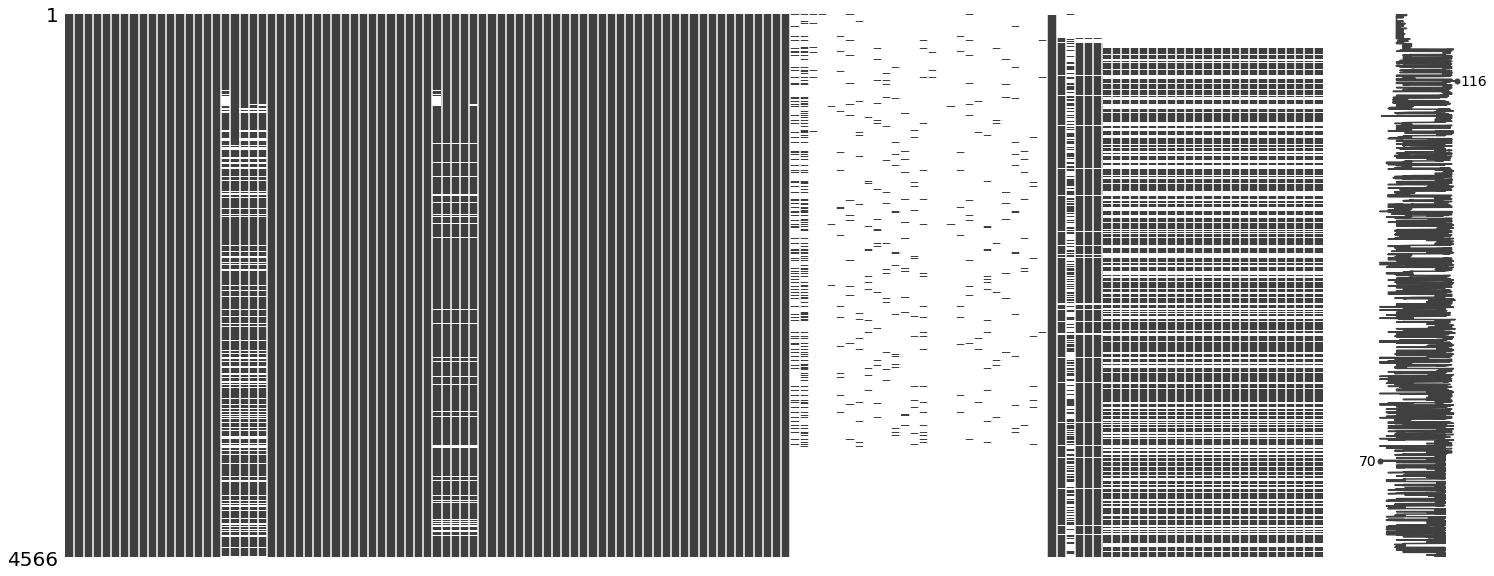

In [5]:
msno.matrix(master_df)

In [6]:
master_df.describe()

,R_odds,B_odds,R_ev,B_ev,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,...,R_td_attempted_bout,B_td_attempted_bout,R_td_pct_bout,B_td_pct_bout,R_sub_attempts_bout,B_sub_attempts_bout,R_pass_bout,B_pass_bout,R_rev_bout,B_rev_bout
count,4566.000000,4566.000000,4566.000000,4566.000000,4566.000000,4566.000000,4566.000000,4566.000000,3636.000000,3801.000000,...,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000
mean,-118.947438,67.545554,95.120955,168.657489,3.180245,0.474157,0.860053,0.008541,28.330812,0.442832,...,3.107143,2.768759,0.293701,0.243701,0.403319,0.331890,1.245671,0.920274,0.137807,0.138889
std,271.023023,250.062760,84.070214,138.611869,0.568748,0.770833,1.297531,0.096677,20.704237,0.123181,...,3.740074,3.690125,0.358537,0.341570,0.823485,0.764293,2.136931,1.746407,0.428739,0.432164
min,-1700.000000,-1200.000000,5.882353,8.333333,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-255.000000,-145.000000,39.215686,68.965517,3.000000,0.000000,0.000000,0.000000,11.000000,0.382000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-150.000000,130.000000,66.666667,130.000000,3.000000,0.000000,0.000000,0.000000,27.171429,0.450000,...,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,128.750000,220.000000,128.750000,220.000000,3.000000,1.000000,1.000000,0.000000,40.507353,0.510000,...,5.000000,4.000000,0.500000,0.500000,1.000000,0.000000,2.000000,1.000000,0.000000,0.000000
max,775.000000,1300.000000,775.000000,1300.000000,5.000000,6.000000,12.000000,2.000000,154.000000,1.000000,...,27.000000,33.000000,1.000000,1.000000,7.000000,7.000000,26.000000,14.000000,5.000000,3.000000


In [7]:
print(master_df.columns.tolist())

['R_fighter', 'B_fighter', 'R_odds', 'B_odds', 'R_ev', 'B_ev', 'date', 'location', 'country', 'Winner', 'title_bout', 'weight_class', 'gender', 'no_of_rounds', 'B_current_lose_streak', 'B_current_win_streak', 'B_draw', 'B_avg_SIG_STR_landed', 'B_avg_SIG_STR_pct', 'B_avg_SUB_ATT', 'B_avg_TD_landed', 'B_avg_TD_pct', 'B_longest_win_streak', 'B_losses', 'B_total_rounds_fought', 'B_total_title_bouts', 'B_win_by_Decision_Majority', 'B_win_by_Decision_Split', 'B_win_by_Decision_Unanimous', 'B_win_by_KO/TKO', 'B_win_by_Submission', 'B_win_by_TKO_Doctor_Stoppage', 'B_wins', 'B_Stance', 'B_Height_cms', 'B_Reach_cms', 'B_Weight_lbs', 'R_current_lose_streak', 'R_current_win_streak', 'R_draw', 'R_avg_SIG_STR_landed', 'R_avg_SIG_STR_pct', 'R_avg_SUB_ATT', 'R_avg_TD_landed', 'R_avg_TD_pct', 'R_longest_win_streak', 'R_losses', 'R_total_rounds_fought', 'R_total_title_bouts', 'R_win_by_Decision_Majority', 'R_win_by_Decision_Split', 'R_win_by_Decision_Unanimous', 'R_win_by_KO/TKO', 'R_win_by_Submission',

In [8]:
master_df1 = master_df.drop([ 'B_match_weightclass_rank', 'R_match_weightclass_rank','finish', 'finish_details', 'finish_round', 'finish_round_time', 'total_fight_time_secs', 'R_kd_bout', 'B_kd_bout', 
                             'R_sig_str_landed_bout', 'B_sig_str_landed_bout', 'R_sig_str_attempted_bout', 'B_sig_str_attempted_bout', 'R_sig_str_pct_bout', 
                             'B_sig_str_pct_bout', 'R_tot_str_landed_bout', 'B_tot_str_landed_bout', 'R_tot_str_attempted_bout', 'B_tot_str_attempted_bout', 
                             'R_td_landed_bout', 'B_td_landed_bout', 'R_td_attempted_bout', 'B_td_attempted_bout', 'R_td_pct_bout', 'B_td_pct_bout', 
                             'R_sub_attempts_bout', 'B_sub_attempts_bout', 'R_pass_bout', 'B_pass_bout', 'R_rev_bout', 'B_rev_bout'], axis = 1)

In [9]:
master_df1 = master_df1.drop([ "R_Women's Flyweight_rank", "R_Women's Featherweight_rank", "R_Women's Strawweight_rank", "R_Women's Bantamweight_rank", 
                              'R_Heavyweight_rank', 'R_Light Heavyweight_rank', 'R_Middleweight_rank', 'R_Welterweight_rank', 'R_Lightweight_rank', 
                              'R_Featherweight_rank', 'R_Bantamweight_rank', 'R_Flyweight_rank', 'R_Pound-for-Pound_rank', "B_Women's Flyweight_rank", 
                              "B_Women's Featherweight_rank", "B_Women's Strawweight_rank", "B_Women's Bantamweight_rank", 'B_Heavyweight_rank', 
                              'B_Light Heavyweight_rank', 'B_Middleweight_rank', 'B_Welterweight_rank', 'B_Lightweight_rank', 'B_Featherweight_rank', 
                              'B_Bantamweight_rank', 'B_Flyweight_rank', 'B_Pound-for-Pound_rank'], axis =1)

In [10]:
master_df1.count()

R_fighter          4566
B_fighter          4566
R_odds             4566
B_odds             4566
R_ev               4566
                   ... 
avg_sub_att_dif    4566
avg_td_dif         4566
empty_arena        4566
constant_1         4566
better_rank        4556
Length: 80, dtype: int64

In [11]:
master_df1['index'] = range(1, len(master_df1) + 1)

In [12]:
master_df1.head()

,R_fighter,B_fighter,R_odds,B_odds,R_ev,B_ev,date,location,country,Winner,...,height_dif,reach_dif,age_dif,sig_str_dif,avg_sub_att_dif,avg_td_dif,empty_arena,constant_1,better_rank,index
0,Alistair Overeem,Alexander Volkov,150,-182,150.000000,54.945055,2/6/2021,"Las Vegas, Nevada, USA",USA,Blue,...,7.62,0.00,-8,1.05,-0.6,-0.75,1,1,Red,1
1,Cory Sandhagen,Frankie Edgar,-400,300,25.000000,300.000000,2/6/2021,"Las Vegas, Nevada, USA",USA,Red,...,-12.70,-5.08,11,-3.18,-0.2,1.21,1,1,Red,2
2,Alexandre Pantoja,Manel Kape,-125,100,80.000000,100.000000,2/6/2021,"Las Vegas, Nevada, USA",USA,Red,...,0.00,2.54,-3,-4.20,-1.1,-1.08,1,1,Red,3
3,Diego Ferreira,Beneil Dariush,-125,105,80.000000,105.000000,2/6/2021,"Las Vegas, Nevada, USA",USA,Blue,...,2.54,-5.08,-5,-1.09,0.1,0.71,1,1,Red,4
4,Michael Johnson,Clay Guida,-225,175,44.444444,175.000000,2/6/2021,"Las Vegas, Nevada, USA",USA,Blue,...,-7.62,-7.62,5,-1.82,0.6,2.86,1,1,neither,5


<AxesSubplot:>

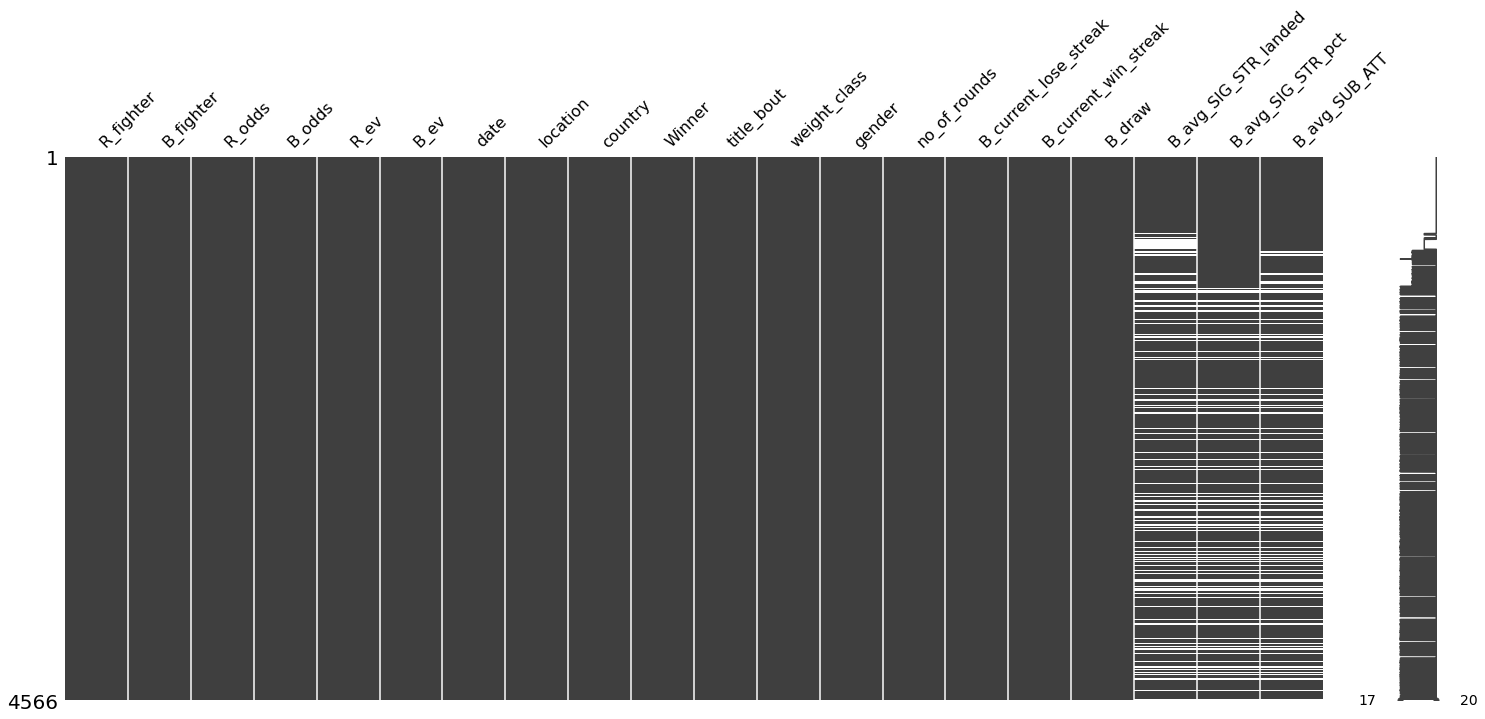

In [13]:
msno.matrix(master_df1.iloc[:,0:20])

<AxesSubplot:>

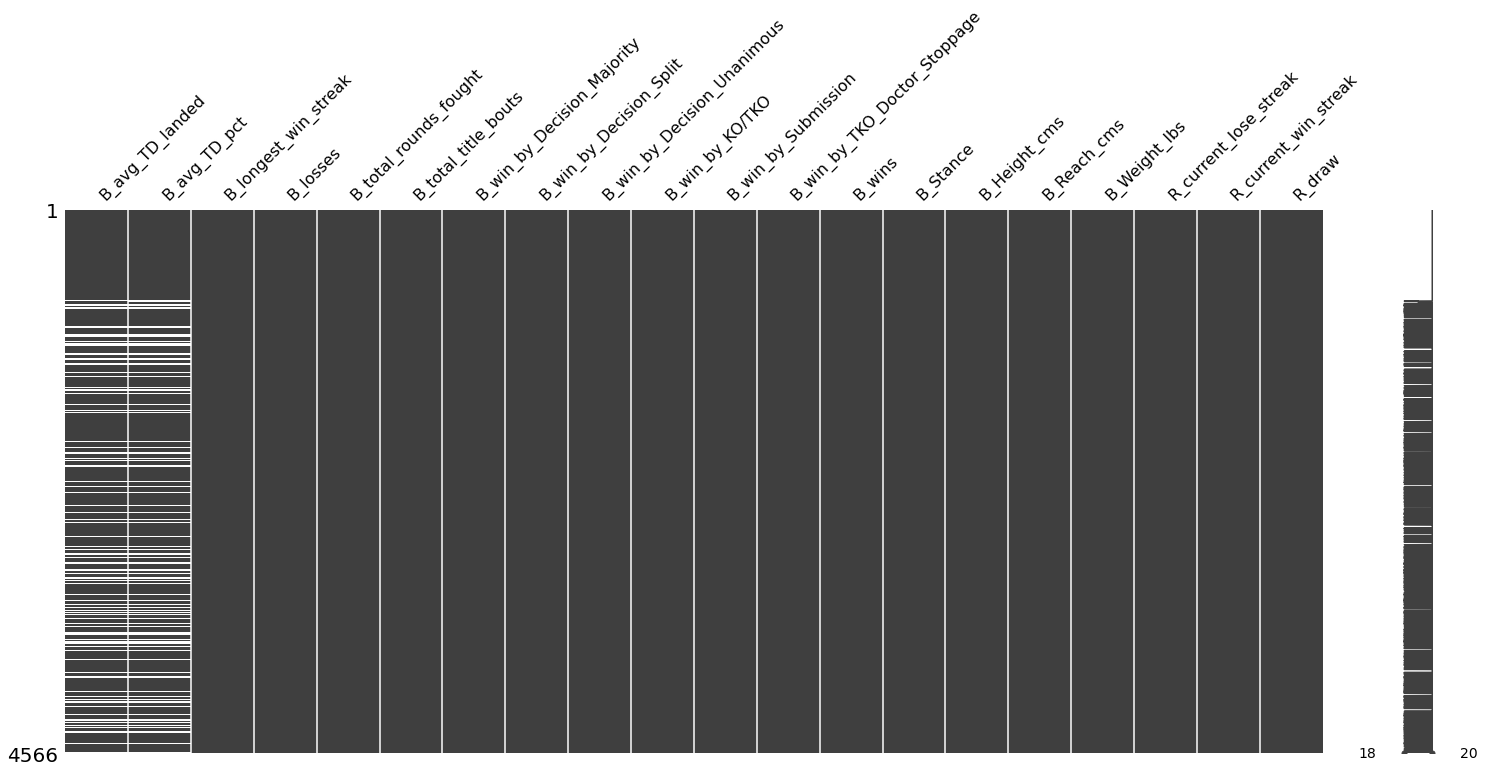

In [14]:
msno.matrix(master_df1.iloc[:,20:40])

<AxesSubplot:>

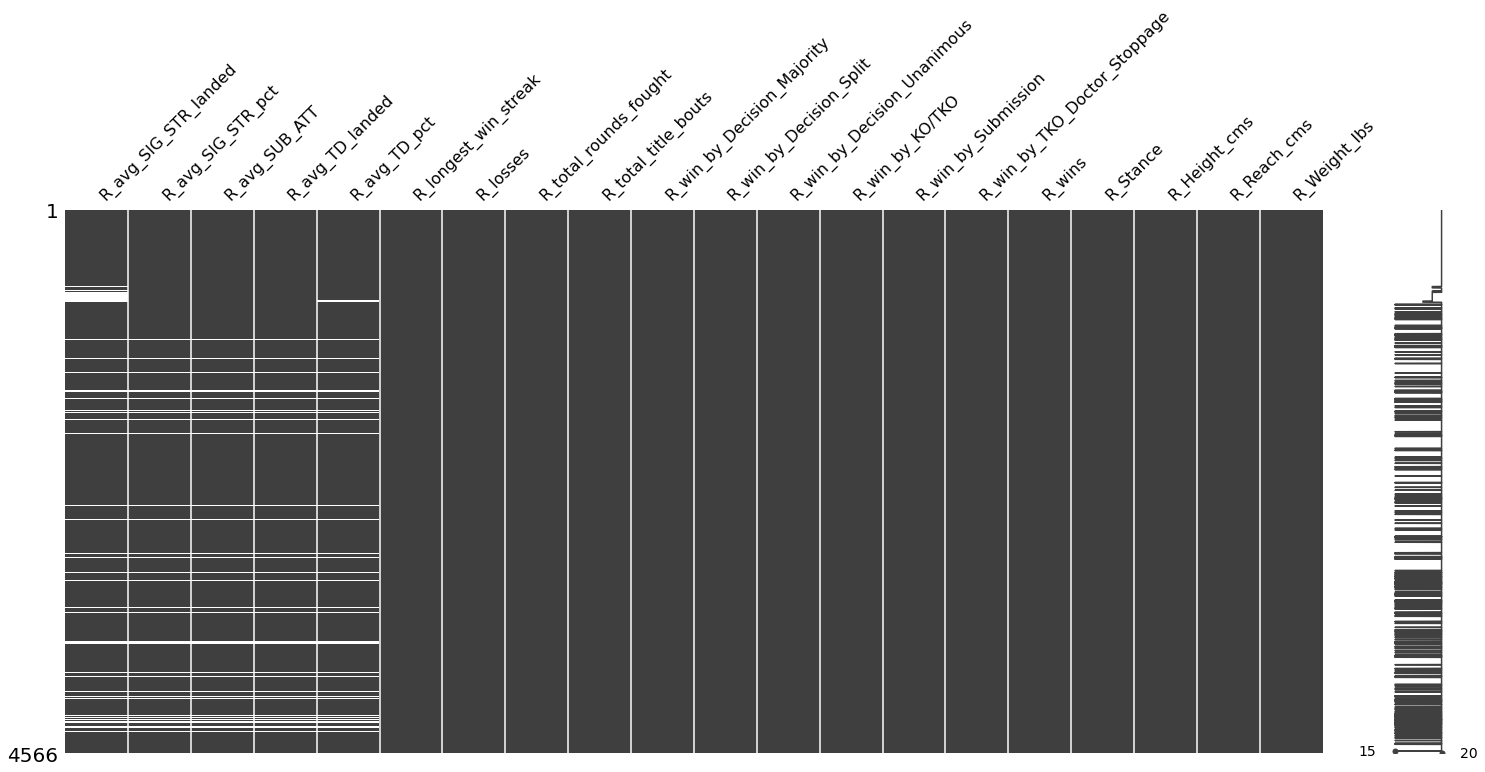

In [15]:
msno.matrix(master_df1.iloc[:,40:60])

<AxesSubplot:>

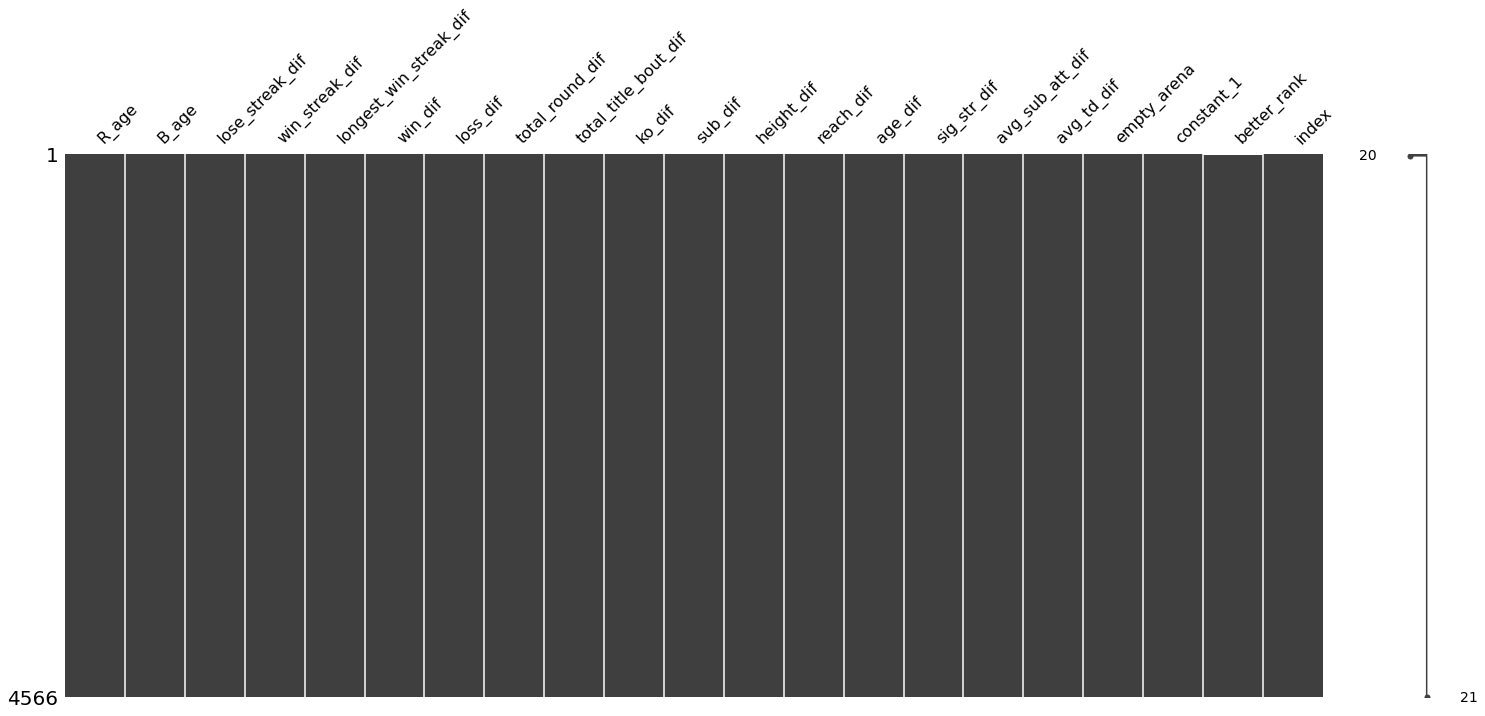

In [16]:
msno.matrix(master_df1.iloc[:,60:81])

# Create fighter dataframe to impute missing data points

In [17]:
print(master_df1.columns.tolist())

['R_fighter', 'B_fighter', 'R_odds', 'B_odds', 'R_ev', 'B_ev', 'date', 'location', 'country', 'Winner', 'title_bout', 'weight_class', 'gender', 'no_of_rounds', 'B_current_lose_streak', 'B_current_win_streak', 'B_draw', 'B_avg_SIG_STR_landed', 'B_avg_SIG_STR_pct', 'B_avg_SUB_ATT', 'B_avg_TD_landed', 'B_avg_TD_pct', 'B_longest_win_streak', 'B_losses', 'B_total_rounds_fought', 'B_total_title_bouts', 'B_win_by_Decision_Majority', 'B_win_by_Decision_Split', 'B_win_by_Decision_Unanimous', 'B_win_by_KO/TKO', 'B_win_by_Submission', 'B_win_by_TKO_Doctor_Stoppage', 'B_wins', 'B_Stance', 'B_Height_cms', 'B_Reach_cms', 'B_Weight_lbs', 'R_current_lose_streak', 'R_current_win_streak', 'R_draw', 'R_avg_SIG_STR_landed', 'R_avg_SIG_STR_pct', 'R_avg_SUB_ATT', 'R_avg_TD_landed', 'R_avg_TD_pct', 'R_longest_win_streak', 'R_losses', 'R_total_rounds_fought', 'R_total_title_bouts', 'R_win_by_Decision_Majority', 'R_win_by_Decision_Split', 'R_win_by_Decision_Unanimous', 'R_win_by_KO/TKO', 'R_win_by_Submission',

In [18]:
fighter_df_R = master_df1[['date', 'R_fighter', 'R_odds', 'R_ev', 'R_current_lose_streak','R_current_win_streak', 'R_draw', 'R_avg_SIG_STR_landed', 'R_avg_SIG_STR_pct', 
                         'R_avg_SUB_ATT', 'R_avg_TD_landed', 'R_avg_TD_pct','R_longest_win_streak', 'R_losses', 'R_total_rounds_fought', 'R_total_title_bouts', 
                         'R_win_by_Decision_Majority', 'R_win_by_Decision_Split', 'R_win_by_Decision_Unanimous', 'R_win_by_KO/TKO', 'R_win_by_Submission', 
                         'R_win_by_TKO_Doctor_Stoppage', 'R_wins', 'R_Stance', 'R_Height_cms', 'R_Reach_cms', 'R_Weight_lbs', 'R_age','index']]

In [19]:
fighter_df_B = master_df1[['date', 'B_fighter', 'B_odds', 'B_ev', 'B_current_lose_streak','B_current_win_streak', 'B_draw', 'B_avg_SIG_STR_landed', 'B_avg_SIG_STR_pct', 
                         'B_avg_SUB_ATT', 'B_avg_TD_landed', 'B_avg_TD_pct','B_longest_win_streak', 'B_losses', 'B_total_rounds_fought', 'B_total_title_bouts', 
                         'B_win_by_Decision_Majority', 'B_win_by_Decision_Split', 'B_win_by_Decision_Unanimous', 'B_win_by_KO/TKO', 'B_win_by_Submission', 
                         'B_win_by_TKO_Doctor_Stoppage', 'B_wins', 'B_Stance', 'B_Height_cms', 'B_Reach_cms', 'B_Weight_lbs', 'B_age','index']]

In [20]:
fighter_df_R

,date,R_fighter,R_odds,R_ev,R_current_lose_streak,R_current_win_streak,R_draw,R_avg_SIG_STR_landed,R_avg_SIG_STR_pct,R_avg_SUB_ATT,...,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,R_age,index
0,2/6/2021,Alistair Overeem,150,150.000000,0,2,0,3.710000,0.640000,0.800000,...,20,8,0,33,Orthodox,193.04,203.20,265,40,1
1,2/6/2021,Cory Sandhagen,-400,25.000000,0,1,0,6.880000,0.480000,0.500000,...,3,1,0,6,Switch,180.34,177.80,135,28,2
2,2/6/2021,Alexandre Pantoja,-125,80.000000,1,0,0,4.200000,0.470000,1.100000,...,2,2,0,6,Orthodox,165.10,170.18,125,30,3
3,2/6/2021,Diego Ferreira,-125,80.000000,0,6,0,5.070000,0.360000,1.000000,...,3,2,0,8,Orthodox,175.26,187.96,155,36,4
4,2/6/2021,Michael Johnson,-225,44.444444,3,0,0,4.230000,0.380000,0.100000,...,4,0,0,11,Southpaw,177.80,185.42,155,34,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4561,3/21/2010,Duane Ludwig,-155,64.516129,1,0,0,13.666667,0.576667,0.000000,...,1,0,0,2,Orthodox,177.80,177.80,170,31,4562
4562,3/21/2010,John Howard,-210,47.619048,0,3,0,18.000000,0.550000,1.000000,...,1,0,0,3,Orthodox,170.18,180.34,170,27,4563
4563,3/21/2010,Brendan Schaub,-260,38.461538,1,0,0,12.000000,0.250000,0.000000,...,0,0,0,0,Orthodox,193.04,198.12,245,27,4564
4564,3/21/2010,Mike Pierce,-420,23.809524,1,0,0,40.500000,0.405000,0.000000,...,0,0,0,1,Orthodox,172.72,177.80,170,29,4565


In [21]:
fighter_df_B

,date,B_fighter,B_odds,B_ev,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,...,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_wins,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,B_age,index
0,2/6/2021,Alexander Volkov,-182,54.945055,0,1,0,4.760000,0.58,0.200000,...,3,0,0,6,Orthodox,200.66,203.20,250,32,1
1,2/6/2021,Frankie Edgar,300,300.000000,0,1,1,3.700000,0.39,0.300000,...,5,2,0,18,Orthodox,167.64,172.72,135,39,2
2,2/6/2021,Manel Kape,100,100.000000,0,0,0,0.000000,0.00,0.000000,...,0,0,0,0,Southpaw,165.10,172.72,125,27,3
3,2/6/2021,Beneil Dariush,105,105.000000,0,5,1,3.980000,0.49,1.100000,...,3,5,0,13,Southpaw,177.80,182.88,155,31,4
4,2/6/2021,Clay Guida,175,175.000000,2,0,0,2.410000,0.33,0.700000,...,2,4,0,17,Orthodox,170.18,177.80,155,39,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4561,3/21/2010,Darren Elkins,135,135.000000,0,0,0,NaN,NaN,NaN,...,0,0,0,0,Orthodox,177.80,180.34,145,25,4562
4562,3/21/2010,Daniel Roberts,175,175.000000,0,0,0,NaN,NaN,NaN,...,0,0,0,0,Southpaw,177.80,187.96,170,29,4563
4563,3/21/2010,Chase Gormley,220,220.000000,1,0,0,8.000000,0.34,1.000000,...,0,0,0,0,Orthodox,190.50,196.00,265,27,4564
4564,3/21/2010,Julio Paulino,335,335.000000,0,0,0,NaN,NaN,NaN,...,0,0,0,0,Orthodox,182.88,185.42,170,34,4565


In [22]:
fighter_df_B_columns = fighter_df_B.columns

fighter_df_B.columns = fighter_df_R.columns
fighter_df = pd.concat([fighter_df_B, fighter_df_R], axis=0, ignore_index=True)

In [23]:
fighter_df['index_1'] = range(1, len(fighter_df) + 1)

In [24]:
fighter_df['date'] = pd.to_datetime(fighter_df['date'])

master_df1['date'] = pd.to_datetime(master_df1['date'])

In [25]:
fighter_df = fighter_df.sort_values(by=['R_fighter','date'])

In [26]:
f = fighter_df[['R_avg_SIG_STR_landed','R_avg_SIG_STR_pct', 'R_avg_SUB_ATT', 'R_avg_TD_landed', 'R_avg_TD_pct']]

for value in f:
    fighter_df[value] = fighter_df.groupby(['R_fighter'], sort=False)[value].apply(lambda x: x.fillna(x.interpolate(limit_direction='both')))

In [27]:
fighter_df.describe()

,R_odds,R_ev,R_current_lose_streak,R_current_win_streak,R_draw,R_avg_SIG_STR_landed,R_avg_SIG_STR_pct,R_avg_SUB_ATT,R_avg_TD_landed,R_avg_TD_pct,...,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Height_cms,R_Reach_cms,R_Weight_lbs,R_age,index,index_1
count,9132.000000,9132.000000,9132.000000,9132.000000,9132.000000,9013.000000,9035.000000,9029.000000,9029.000000,9029.000000,...,9132.000000,9132.000000,9132.000000,9132.000000,9132.000000,9132.000000,9132.000000,9132.000000,9132.000000,9132.000000
mean,-25.700942,131.889222,0.538108,0.950175,0.008432,28.674732,0.448385,0.505151,1.255813,0.313437,...,1.181888,0.718353,0.041283,3.521901,178.124838,182.559468,165.228318,29.723390,2283.500000,4566.500000
std,276.913066,120.379151,0.815987,1.501298,0.097246,20.793881,0.122966,0.704329,1.332730,0.255412,...,1.887392,1.356408,0.211755,3.978238,8.940146,10.888502,34.304331,4.050515,1318.162808,2636.325663
min,-1700.000000,5.882353,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,152.400000,0.000000,115.000000,19.000000,1.000000,1.000000
25%,-200.000000,50.000000,0.000000,0.000000,0.000000,12.000000,0.383036,0.000000,0.240000,0.100000,...,0.000000,0.000000,0.000000,1.000000,172.720000,175.260000,145.000000,27.000000,1142.000000,2283.750000
50%,-110.000000,90.909091,0.000000,0.000000,0.000000,26.857143,0.450000,0.285714,1.000000,0.302000,...,0.000000,0.000000,0.000000,2.000000,177.800000,182.880000,155.000000,30.000000,2283.500000,4566.500000
75%,170.000000,170.000000,1.000000,1.000000,0.000000,41.000000,0.515000,0.800000,1.909091,0.468571,...,2.000000,1.000000,0.000000,5.000000,185.420000,190.500000,185.000000,32.000000,3425.000000,6849.250000
max,1300.000000,1300.000000,7.000000,16.000000,2.000000,154.000000,1.000000,8.300000,12.500000,1.000000,...,21.000000,13.000000,2.000000,33.000000,210.820000,214.630000,265.000000,47.000000,4566.000000,9132.000000


<AxesSubplot:>

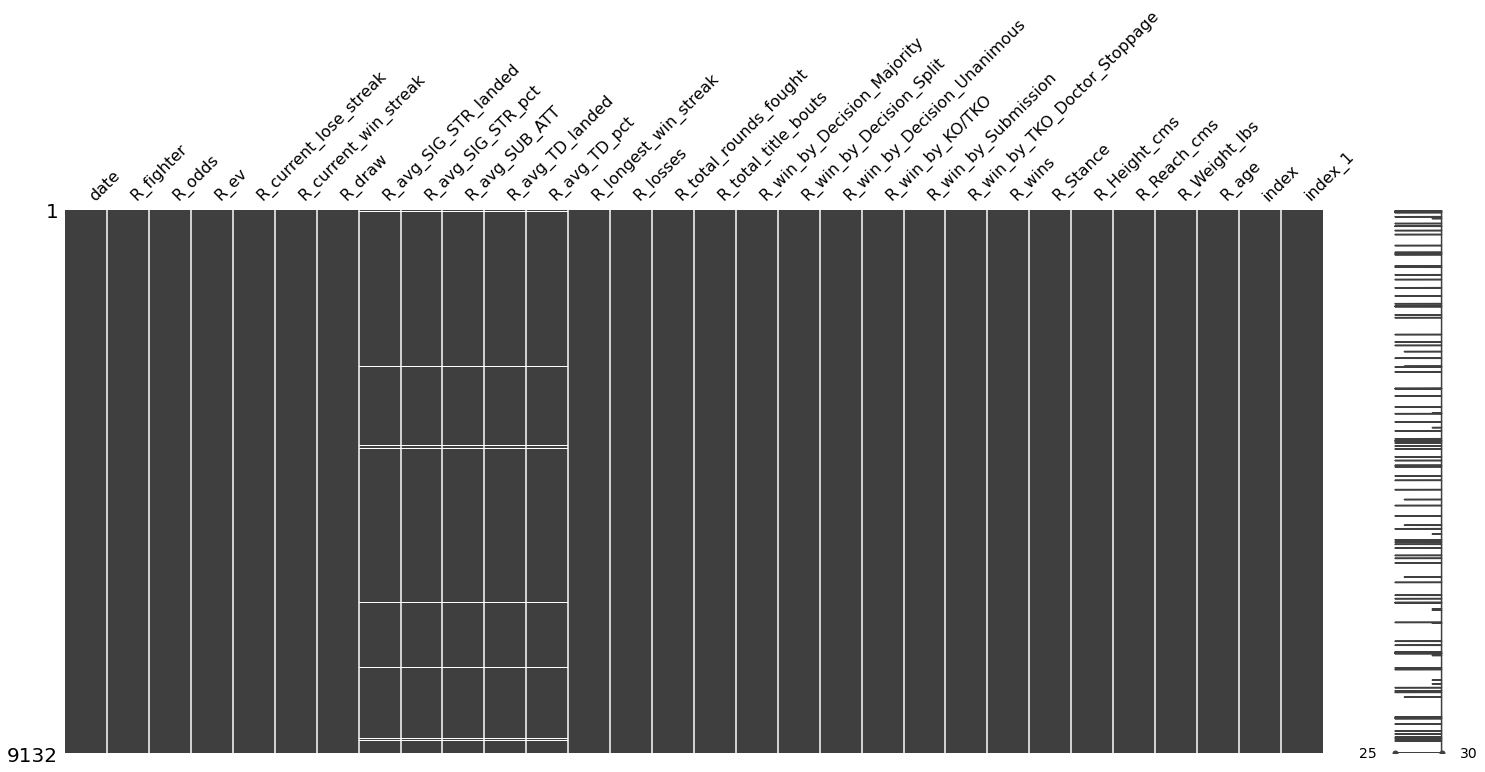

In [28]:
msno.matrix(fighter_df)

# Feature engineering: Create differencing columns

In [29]:
fighter_df.columns

Index(['date', 'R_fighter', 'R_odds', 'R_ev', 'R_current_lose_streak',
       'R_current_win_streak', 'R_draw', 'R_avg_SIG_STR_landed',
       'R_avg_SIG_STR_pct', 'R_avg_SUB_ATT', 'R_avg_TD_landed', 'R_avg_TD_pct',
       'R_longest_win_streak', 'R_losses', 'R_total_rounds_fought',
       'R_total_title_bouts', 'R_win_by_Decision_Majority',
       'R_win_by_Decision_Split', 'R_win_by_Decision_Unanimous',
       'R_win_by_KO/TKO', 'R_win_by_Submission',
       'R_win_by_TKO_Doctor_Stoppage', 'R_wins', 'R_Stance', 'R_Height_cms',
       'R_Reach_cms', 'R_Weight_lbs', 'R_age', 'index', 'index_1'],
      dtype='object')

In [30]:
fighter_df['R_odds_diff'] = fighter_df.groupby(['R_fighter'])['R_odds'].diff()
fighter_df['R_ev_diff'] = fighter_df.groupby(['R_fighter'])['R_ev'].diff()
fighter_df['R_current_lose_streak_diff'] = fighter_df.groupby(['R_fighter'])['R_current_lose_streak'].diff()
fighter_df['R_current_win_streak_diff'] = fighter_df.groupby(['R_fighter'])['R_current_win_streak'].diff
fighter_df['R_avg_SIG_STR_landed_diff'] = fighter_df.groupby(['R_fighter'])['R_avg_SIG_STR_landed'].diff()
fighter_df['R_avg_SIG_STR_pct_diff'] = fighter_df.groupby(['R_fighter'])['R_avg_SIG_STR_pct'].diff()
fighter_df['R_avg_SUB_ATT_diff'] = fighter_df.groupby(['R_fighter'])['R_avg_SUB_ATT'].diff()
fighter_df['R_avg_TD_landed_diff'] = fighter_df.groupby(['R_fighter'])['R_avg_TD_landed'].diff()
fighter_df['R_avg_TD_pct_diff'] = fighter_df.groupby(['R_fighter'])['R_avg_TD_pct'].diff()
fighter_df['R_longest_win_streak_diff'] = fighter_df.groupby(['R_fighter'])['R_longest_win_streak'].diff()
fighter_df['R_losses_diff'] = fighter_df.groupby(['R_fighter'])['R_losses'].diff()
fighter_df['R_total_rounds_fought_diff'] = fighter_df.groupby(['R_fighter'])['R_total_rounds_fought'].diff()
fighter_df['R_total_title_bouts_diff'] = fighter_df.groupby(['R_fighter'])['R_total_title_bouts'].diff()
fighter_df['R_win_by_Decision_Majority_diff'] = fighter_df.groupby(['R_fighter'])['R_win_by_Decision_Majority'].diff()
fighter_df['R_win_by_Decision_Split_diff'] = fighter_df.groupby(['R_fighter'])['R_win_by_Decision_Split'].diff()
fighter_df['R_win_by_Decision_Unanimous_diff'] = fighter_df.groupby(['R_fighter'])['R_win_by_Decision_Unanimous'].diff()
fighter_df['R_win_by_KO/TKO_diff'] = fighter_df.groupby(['R_fighter'])['R_win_by_KO/TKO'].diff()
fighter_df['R_win_by_Submission_diff'] = fighter_df.groupby(['R_fighter'])['R_win_by_Submission'].diff()
fighter_df['R_win_by_TKO_Doctor_Stoppage_diff'] = fighter_df.groupby(['R_fighter'])['R_win_by_TKO_Doctor_Stoppage'].diff()
fighter_df['R_wins_diff'] = fighter_df.groupby(['R_fighter'])['R_wins'].diff()
fighter_df['R_Weight_lbs_diff'] = fighter_df.groupby(['R_fighter'])['R_Weight_lbs'].diff()
fighter_df['R_age_diff'] = fighter_df.groupby(['R_fighter'])['R_age'].diff()
fighter_df['R_time_since_last_fight'] = fighter_df.groupby(['R_fighter'])['date'].diff()

In [31]:
fighter_df.describe()

,R_odds,R_ev,R_current_lose_streak,R_current_win_streak,R_draw,R_avg_SIG_STR_landed,R_avg_SIG_STR_pct,R_avg_SUB_ATT,R_avg_TD_landed,R_avg_TD_pct,...,R_win_by_Decision_Majority_diff,R_win_by_Decision_Split_diff,R_win_by_Decision_Unanimous_diff,R_win_by_KO/TKO_diff,R_win_by_Submission_diff,R_win_by_TKO_Doctor_Stoppage_diff,R_wins_diff,R_Weight_lbs_diff,R_age_diff,R_time_since_last_fight
count,9132.000000,9132.000000,9132.000000,9132.000000,9132.000000,9013.000000,9035.000000,9029.000000,9029.000000,9029.000000,...,7454.000000,7454.000000,7454.000000,7454.000000,7454.000000,7454.000000,7454.000000,7454.000000,7454.000000,7454
mean,-25.700942,131.889222,0.538108,0.950175,0.008432,28.674732,0.448385,0.505151,1.255813,0.313437,...,0.003086,0.059565,0.211028,0.183526,0.105178,0.001342,0.604373,0.005903,0.563724,205 days 19:56:12.041856722
std,276.913066,120.379151,0.815987,1.501298,0.097246,20.793881,0.122966,0.704329,1.332730,0.255412,...,0.060110,0.255767,0.529177,0.640229,0.468165,0.091198,0.826592,1.674897,0.804625,157 days 02:04:53.770371012
min,-1700.000000,5.882353,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-2.000000,-8.000000,-11.000000,-13.000000,-2.000000,-11.000000,-45.000000,-10.000000,10 days 00:00:00
25%,-200.000000,50.000000,0.000000,0.000000,0.000000,12.000000,0.383036,0.000000,0.240000,0.100000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,119 days 00:00:00
50%,-110.000000,90.909091,0.000000,0.000000,0.000000,26.857143,0.450000,0.285714,1.000000,0.302000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,168 days 00:00:00
75%,170.000000,170.000000,1.000000,1.000000,0.000000,41.000000,0.515000,0.800000,1.909091,0.468571,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,238 days 00:00:00
max,1300.000000,1300.000000,7.000000,16.000000,2.000000,154.000000,1.000000,8.300000,12.500000,1.000000,...,1.000000,2.000000,8.000000,19.000000,8.000000,1.000000,22.000000,25.000000,11.000000,3199 days 00:00:00


In [32]:
diff_list = ['R_odds_diff', 'R_ev_diff',
       'R_current_lose_streak_diff', 'R_current_win_streak_diff',
       'R_avg_SIG_STR_landed_diff', 'R_avg_SIG_STR_pct_diff',
       'R_avg_SUB_ATT_diff', 'R_avg_TD_landed_diff', 'R_avg_TD_pct_diff',
       'R_longest_win_streak_diff', 'R_losses_diff',
       'R_total_rounds_fought_diff', 'R_total_title_bouts_diff',
       'R_win_by_Decision_Majority_diff', 'R_win_by_Decision_Split_diff',
       'R_win_by_Decision_Unanimous_diff', 'R_win_by_KO/TKO_diff',
       'R_win_by_Submission_diff', 'R_win_by_TKO_Doctor_Stoppage_diff',
       'R_wins_diff', 'R_Weight_lbs_diff', 'R_age_diff',
       'R_time_since_last_fight']

for value in diff_list:
    fighter_df[value] = fighter_df.groupby(['R_fighter'], sort=False)[value].apply(lambda x: x.fillna(x.interpolate(limit_direction='both')))

In [33]:
fighter_df = fighter_df.groupby(['R_fighter']).apply(lambda x: x.fillna(x.mean()))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.


In [34]:
fighter_df = fighter_df.sort_values(['index_1'])

In [35]:
#rslt_df = dataframe[dataframe['Percentage'] > 80] 

split_B = fighter_df[fighter_df['index_1'] <= 4566]
split_R = fighter_df[fighter_df['index_1'] > 4566]

In [36]:
split_B.columns

Index(['date', 'R_fighter', 'R_odds', 'R_ev', 'R_current_lose_streak',
       'R_current_win_streak', 'R_draw', 'R_avg_SIG_STR_landed',
       'R_avg_SIG_STR_pct', 'R_avg_SUB_ATT', 'R_avg_TD_landed', 'R_avg_TD_pct',
       'R_longest_win_streak', 'R_losses', 'R_total_rounds_fought',
       'R_total_title_bouts', 'R_win_by_Decision_Majority',
       'R_win_by_Decision_Split', 'R_win_by_Decision_Unanimous',
       'R_win_by_KO/TKO', 'R_win_by_Submission',
       'R_win_by_TKO_Doctor_Stoppage', 'R_wins', 'R_Stance', 'R_Height_cms',
       'R_Reach_cms', 'R_Weight_lbs', 'R_age', 'index', 'index_1',
       'R_odds_diff', 'R_ev_diff', 'R_current_lose_streak_diff',
       'R_current_win_streak_diff', 'R_avg_SIG_STR_landed_diff',
       'R_avg_SIG_STR_pct_diff', 'R_avg_SUB_ATT_diff', 'R_avg_TD_landed_diff',
       'R_avg_TD_pct_diff', 'R_longest_win_streak_diff', 'R_losses_diff',
       'R_total_rounds_fought_diff', 'R_total_title_bouts_diff',
       'R_win_by_Decision_Majority_diff', 'R_win_b

In [37]:
split_B.columns = ['date', 'B_fighter', 'B_odds', 'B_ev', 'B_current_lose_streak',
       'B_current_win_streak', 'B_draw', 'B_avg_SIG_STR_landed',
       'B_avg_SIG_STR_pct', 'B_avg_SUB_ATT', 'B_avg_TD_landed', 'B_avg_TD_pct',
       'B_longest_win_streak', 'B_losses', 'B_total_rounds_fought',
       'B_total_title_bouts', 'B_win_by_Decision_Majority',
       'B_win_by_Decision_Split', 'B_win_by_Decision_Unanimous',
       'B_win_by_KO/TKO', 'B_win_by_Submission',
       'B_win_by_TKO_Doctor_Stoppage', 'B_wins', 'B_Stance', 'B_Height_cms',
       'B_Reach_cms', 'B_Weight_lbs', 'B_age', 'index', 'index_1',
       'B_odds_diff', 'B_ev_diff', 'B_current_lose_streak_diff',
       'B_current_win_streak_diff', 'B_avg_SIG_STR_landed_diff',
       'B_avg_SIG_STR_pct_diff', 'B_avg_SUB_ATT_diff', 'B_avg_TD_landed_diff',
       'B_avg_TD_pct_diff', 'B_longest_win_streak_diff', 'B_losses_diff',
       'B_total_rounds_fought_diff', 'B_total_title_bouts_diff',
       'B_win_by_Decision_Majority_diff', 'B_win_by_Decision_Split_diff',
       'B_win_by_Decision_Unanimous_diff', 'B_win_by_KO/TKO_diff',
       'B_win_by_Submission_diff', 'B_win_by_TKO_Doctor_Stoppage_diff',
       'B_wins_diff', 'B_Weight_lbs_diff', 'B_age_diff',
       'B_time_since_last_fight']

split_B

,,date,B_fighter,B_odds,B_ev,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,...,B_win_by_Decision_Majority_diff,B_win_by_Decision_Split_diff,B_win_by_Decision_Unanimous_diff,B_win_by_KO/TKO_diff,B_win_by_Submission_diff,B_win_by_TKO_Doctor_Stoppage_diff,B_wins_diff,B_Weight_lbs_diff,B_age_diff,B_time_since_last_fight
R_fighter,,,,,,,,,,,,,,,,,,,,,,
Alexander Volkov,0,2021-02-06,Alexander Volkov,-182,54.945055,0,1,0,4.760000,0.58,0.200000,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,105 days 00:00:00
Frankie Edgar,1,2021-02-06,Frankie Edgar,300,300.000000,0,1,1,3.700000,0.39,0.300000,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,168 days 00:00:00
Manel Kape,2,2021-02-06,Manel Kape,100,100.000000,0,0,0,0.000000,0.00,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
Beneil Dariush,3,2021-02-06,Beneil Dariush,105,105.000000,0,5,1,3.980000,0.49,1.100000,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,182 days 00:00:00
Clay Guida,4,2021-02-06,Clay Guida,175,175.000000,2,0,0,2.410000,0.33,0.700000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,231 days 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Darren Elkins,4561,2010-03-21,Darren Elkins,135,135.000000,0,0,0,0.000000,0.00,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,176 days 13:05:27.272727272
Daniel Roberts,4562,2010-03-21,Daniel Roberts,175,175.000000,0,0,0,7.000000,0.41,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,111 days 16:00:00
Chase Gormley,4563,2010-03-21,Chase Gormley,220,220.000000,1,0,0,8.000000,0.34,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [38]:
split_R

,,date,R_fighter,R_odds,R_ev,R_current_lose_streak,R_current_win_streak,R_draw,R_avg_SIG_STR_landed,R_avg_SIG_STR_pct,R_avg_SUB_ATT,...,R_win_by_Decision_Majority_diff,R_win_by_Decision_Split_diff,R_win_by_Decision_Unanimous_diff,R_win_by_KO/TKO_diff,R_win_by_Submission_diff,R_win_by_TKO_Doctor_Stoppage_diff,R_wins_diff,R_Weight_lbs_diff,R_age_diff,R_time_since_last_fight
R_fighter,,,,,,,,,,,,,,,,,,,,,,
Alistair Overeem,4566,2021-02-06,Alistair Overeem,150,150.000000,0,2,0,3.710000,0.640000,0.800000,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,154 days 00:00:00
Cory Sandhagen,4567,2021-02-06,Cory Sandhagen,-400,25.000000,0,1,0,6.880000,0.480000,0.500000,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,119 days 00:00:00
Alexandre Pantoja,4568,2021-02-06,Alexandre Pantoja,-125,80.000000,1,0,0,4.200000,0.470000,1.100000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,203 days 00:00:00
Diego Ferreira,4569,2021-02-06,Diego Ferreira,-125,80.000000,0,6,0,5.070000,0.360000,1.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,385 days 00:00:00
Michael Johnson,4570,2021-02-06,Michael Johnson,-225,44.444444,3,0,0,4.230000,0.380000,0.100000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,269 days 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Duane Ludwig,9127,2010-03-21,Duane Ludwig,-155,64.516129,1,0,0,13.666667,0.576667,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,184 days 14:24:00
John Howard,9128,2010-03-21,John Howard,-210,47.619048,0,3,0,18.000000,0.550000,1.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,209 days 00:00:00
Brendan Schaub,9129,2010-03-21,Brendan Schaub,-260,38.461538,1,0,0,12.000000,0.250000,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,191 days 05:20:00


In [39]:
split_R = split_R.reset_index(drop=True)

In [40]:
split_B = split_B.reset_index(drop=True)

In [41]:
df = split_B.merge(split_R, on="index", how = 'inner')

In [42]:
print(df.columns.tolist())

['date_x', 'B_fighter', 'B_odds', 'B_ev', 'B_current_lose_streak', 'B_current_win_streak', 'B_draw', 'B_avg_SIG_STR_landed', 'B_avg_SIG_STR_pct', 'B_avg_SUB_ATT', 'B_avg_TD_landed', 'B_avg_TD_pct', 'B_longest_win_streak', 'B_losses', 'B_total_rounds_fought', 'B_total_title_bouts', 'B_win_by_Decision_Majority', 'B_win_by_Decision_Split', 'B_win_by_Decision_Unanimous', 'B_win_by_KO/TKO', 'B_win_by_Submission', 'B_win_by_TKO_Doctor_Stoppage', 'B_wins', 'B_Stance', 'B_Height_cms', 'B_Reach_cms', 'B_Weight_lbs', 'B_age', 'index', 'index_1_x', 'B_odds_diff', 'B_ev_diff', 'B_current_lose_streak_diff', 'B_current_win_streak_diff', 'B_avg_SIG_STR_landed_diff', 'B_avg_SIG_STR_pct_diff', 'B_avg_SUB_ATT_diff', 'B_avg_TD_landed_diff', 'B_avg_TD_pct_diff', 'B_longest_win_streak_diff', 'B_losses_diff', 'B_total_rounds_fought_diff', 'B_total_title_bouts_diff', 'B_win_by_Decision_Majority_diff', 'B_win_by_Decision_Split_diff', 'B_win_by_Decision_Unanimous_diff', 'B_win_by_KO/TKO_diff', 'B_win_by_Submis

In [43]:
df = df.rename(columns={"date_x": "date"})
df = df.drop(['date_y'], axis=1)
df

,date,B_fighter,B_odds,B_ev,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,...,R_win_by_Decision_Majority_diff,R_win_by_Decision_Split_diff,R_win_by_Decision_Unanimous_diff,R_win_by_KO/TKO_diff,R_win_by_Submission_diff,R_win_by_TKO_Doctor_Stoppage_diff,R_wins_diff,R_Weight_lbs_diff,R_age_diff,R_time_since_last_fight
0,2021-02-06,Alexander Volkov,-182,54.945055,0,1,0,4.760000,0.58,0.200000,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,154 days 00:00:00
1,2021-02-06,Frankie Edgar,300,300.000000,0,1,1,3.700000,0.39,0.300000,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,119 days 00:00:00
2,2021-02-06,Manel Kape,100,100.000000,0,0,0,0.000000,0.00,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,203 days 00:00:00
3,2021-02-06,Beneil Dariush,105,105.000000,0,5,1,3.980000,0.49,1.100000,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,385 days 00:00:00
4,2021-02-06,Clay Guida,175,175.000000,2,0,0,2.410000,0.33,0.700000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,269 days 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4561,2010-03-21,Darren Elkins,135,135.000000,0,0,0,0.000000,0.00,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,184 days 14:24:00
4562,2010-03-21,Daniel Roberts,175,175.000000,0,0,0,7.000000,0.41,1.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,209 days 00:00:00
4563,2010-03-21,Chase Gormley,220,220.000000,1,0,0,8.000000,0.34,1.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,191 days 05:20:00
4564,2010-03-21,Julio Paulino,335,335.000000,0,0,0,17.000000,0.27,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,190 days 02:10:54.545454546


<AxesSubplot:>

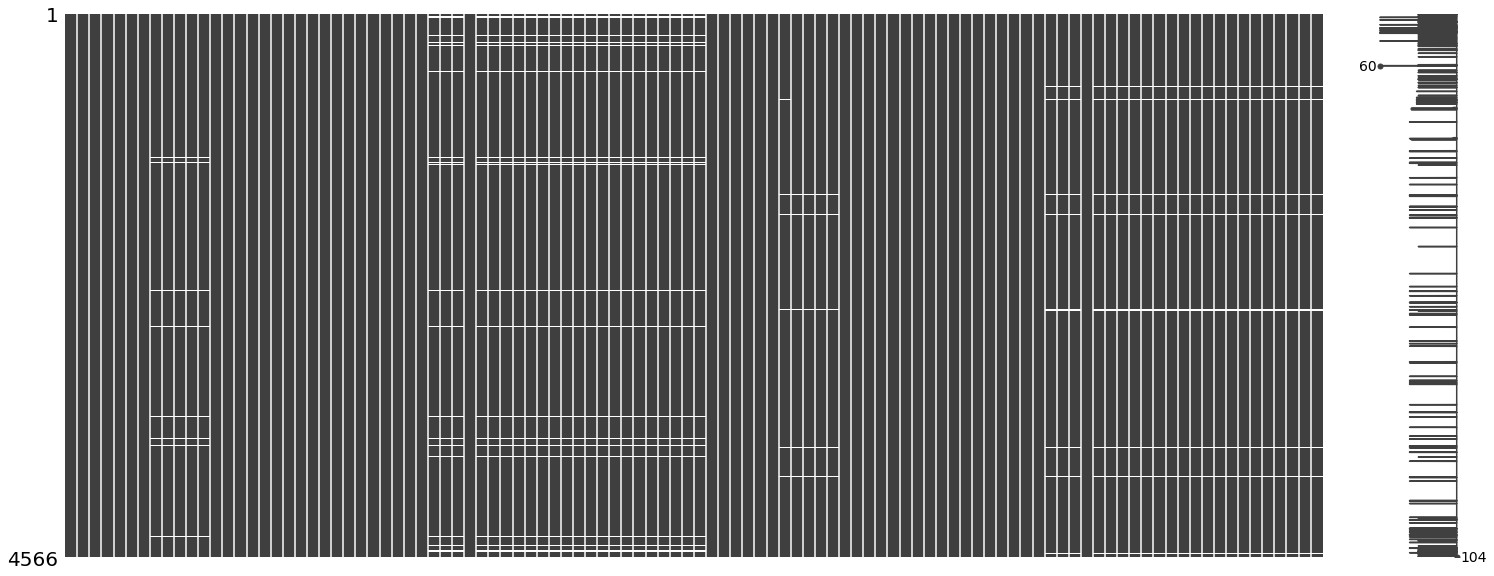

In [44]:
msno.matrix(df)

<AxesSubplot:>

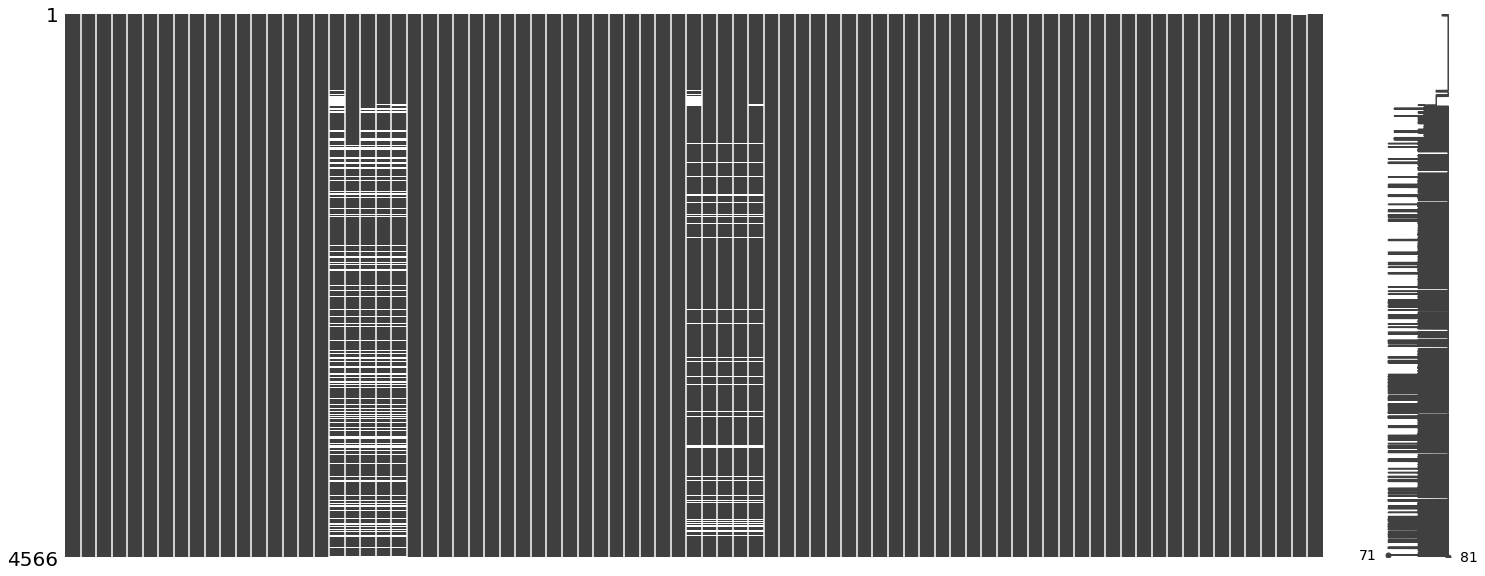

In [45]:
msno.matrix(master_df1)

In [46]:
print(master_df1.columns.tolist())

['R_fighter', 'B_fighter', 'R_odds', 'B_odds', 'R_ev', 'B_ev', 'date', 'location', 'country', 'Winner', 'title_bout', 'weight_class', 'gender', 'no_of_rounds', 'B_current_lose_streak', 'B_current_win_streak', 'B_draw', 'B_avg_SIG_STR_landed', 'B_avg_SIG_STR_pct', 'B_avg_SUB_ATT', 'B_avg_TD_landed', 'B_avg_TD_pct', 'B_longest_win_streak', 'B_losses', 'B_total_rounds_fought', 'B_total_title_bouts', 'B_win_by_Decision_Majority', 'B_win_by_Decision_Split', 'B_win_by_Decision_Unanimous', 'B_win_by_KO/TKO', 'B_win_by_Submission', 'B_win_by_TKO_Doctor_Stoppage', 'B_wins', 'B_Stance', 'B_Height_cms', 'B_Reach_cms', 'B_Weight_lbs', 'R_current_lose_streak', 'R_current_win_streak', 'R_draw', 'R_avg_SIG_STR_landed', 'R_avg_SIG_STR_pct', 'R_avg_SUB_ATT', 'R_avg_TD_landed', 'R_avg_TD_pct', 'R_longest_win_streak', 'R_losses', 'R_total_rounds_fought', 'R_total_title_bouts', 'R_win_by_Decision_Majority', 'R_win_by_Decision_Split', 'R_win_by_Decision_Unanimous', 'R_win_by_KO/TKO', 'R_win_by_Submission',

In [47]:
cols = ['location', 'country', 'Winner', 'title_bout', 'weight_class', 'gender', 'no_of_rounds','lose_streak_dif', 'win_streak_dif', 
   'longest_win_streak_dif', 'win_dif', 'loss_dif', 'total_round_dif', 'total_title_bout_dif', 'ko_dif', 'sub_dif', 'height_dif', 
   'reach_dif', 'age_dif', 'sig_str_dif', 'avg_sub_att_dif', 'avg_td_dif', 'empty_arena', 'constant_1', 'better_rank'] 

for value in cols:
    df[value] = master_df1[value].values

<AxesSubplot:>

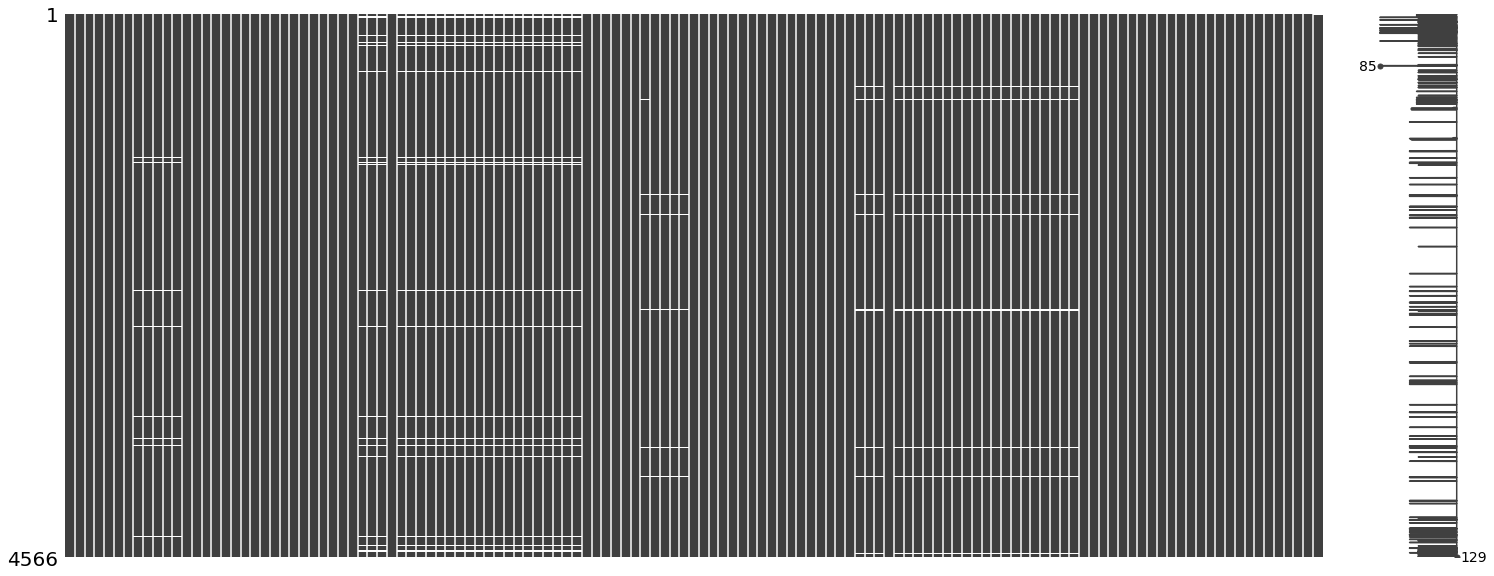

In [48]:
msno.matrix(df)

In [49]:
df.describe()

,B_odds,B_ev,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_landed,B_avg_TD_pct,...,ko_dif,sub_dif,height_dif,reach_dif,age_dif,sig_str_dif,avg_sub_att_dif,avg_td_dif,empty_arena,constant_1
count,4566.000000,4566.000000,4566.000000,4566.000000,4566.000000,4489.000000,4503.000000,4497.000000,4497.000000,4497.000000,...,4566.000000,4566.000000,4566.000000,4566.000000,4566.000000,4566.000000,4566.000000,4566.000000,4566.000000,4566.0
mean,67.545554,168.657489,0.474157,0.860053,0.008541,28.105995,0.442976,0.481199,1.178160,0.300167,...,-0.486640,-0.270696,0.046636,-0.236505,0.421375,-3.779890,-0.071485,-0.217433,0.087604,1.0
std,250.062760,138.611869,0.770833,1.297531,0.096677,21.324643,0.132069,0.697532,1.346620,0.269325,...,2.069477,1.734479,7.014512,9.524065,5.144000,23.295779,0.838389,1.656663,0.282749,0.0
min,-1200.000000,8.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-21.000000,-13.000000,-187.960000,-187.960000,-16.000000,-118.000000,-8.300000,-11.000000,0.000000,1.0
25%,-145.000000,68.965517,0.000000,0.000000,0.000000,10.000000,0.378000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-5.080000,-5.080000,-3.000000,-16.000000,-0.428571,-1.000000,0.000000,1.0
50%,130.000000,130.000000,0.000000,0.000000,0.000000,26.000000,0.448235,0.200000,0.933333,0.280000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-0.965000,0.000000,0.000000,0.000000,1.0
75%,220.000000,220.000000,1.000000,1.000000,0.000000,40.600000,0.515632,0.800000,1.764706,0.466667,...,0.000000,0.000000,5.080000,5.080000,4.000000,6.255357,0.208405,0.550000,0.000000,1.0
max,1300.000000,1300.000000,6.000000,12.000000,2.000000,154.000000,1.000000,7.000000,11.000000,1.000000,...,14.000000,10.000000,30.480000,30.480000,17.000000,128.222222,6.000000,10.000000,1.000000,1.0


In [50]:
df = df.dropna(axis='rows')
df.describe()

,B_odds,B_ev,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_landed,B_avg_TD_pct,...,ko_dif,sub_dif,height_dif,reach_dif,age_dif,sig_str_dif,avg_sub_att_dif,avg_td_dif,empty_arena,constant_1
count,4318.000000,4318.000000,4318.000000,4318.000000,4318.000000,4318.000000,4318.000000,4318.000000,4318.000000,4318.000000,...,4318.000000,4318.000000,4318.000000,4318.000000,4318.000000,4318.000000,4318.000000,4318.000000,4318.000000,4318.0
mean,68.488884,169.199162,0.485873,0.895322,0.008569,28.695108,0.447574,0.484220,1.183602,0.302478,...,-0.485410,-0.275127,0.049903,-0.213620,0.478694,-3.738283,-0.071378,-0.216198,0.078277,1.0
std,250.424112,139.520120,0.778837,1.315143,0.097077,21.207091,0.125014,0.694625,1.343244,0.267852,...,2.106312,1.764654,7.029012,9.580548,5.153011,23.689939,0.837974,1.664828,0.268638,0.0
min,-1200.000000,8.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-21.000000,-13.000000,-187.960000,-187.960000,-16.000000,-118.000000,-8.300000,-11.000000,0.000000,1.0
25%,-145.000000,68.965517,0.000000,0.000000,0.000000,11.000000,0.380000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-5.080000,-5.080000,-3.000000,-16.577151,-0.436711,-1.000000,0.000000,1.0
50%,130.000000,130.000000,0.000000,0.000000,0.000000,26.816667,0.450000,0.200000,1.000000,0.286667,...,0.000000,0.000000,0.000000,0.000000,0.000000,-1.039481,0.000000,-0.033333,0.000000,1.0
75%,223.750000,225.000000,1.000000,1.000000,0.000000,41.000000,0.516917,0.800000,1.763529,0.467443,...,0.000000,0.000000,5.080000,5.080000,4.000000,7.061712,0.246132,0.582500,0.000000,1.0
max,1300.000000,1300.000000,6.000000,12.000000,2.000000,154.000000,1.000000,7.000000,11.000000,1.000000,...,14.000000,10.000000,30.480000,30.480000,17.000000,128.222222,6.000000,10.000000,1.000000,1.0


In [51]:
print(df.columns.tolist())

['date', 'B_fighter', 'B_odds', 'B_ev', 'B_current_lose_streak', 'B_current_win_streak', 'B_draw', 'B_avg_SIG_STR_landed', 'B_avg_SIG_STR_pct', 'B_avg_SUB_ATT', 'B_avg_TD_landed', 'B_avg_TD_pct', 'B_longest_win_streak', 'B_losses', 'B_total_rounds_fought', 'B_total_title_bouts', 'B_win_by_Decision_Majority', 'B_win_by_Decision_Split', 'B_win_by_Decision_Unanimous', 'B_win_by_KO/TKO', 'B_win_by_Submission', 'B_win_by_TKO_Doctor_Stoppage', 'B_wins', 'B_Stance', 'B_Height_cms', 'B_Reach_cms', 'B_Weight_lbs', 'B_age', 'index', 'index_1_x', 'B_odds_diff', 'B_ev_diff', 'B_current_lose_streak_diff', 'B_current_win_streak_diff', 'B_avg_SIG_STR_landed_diff', 'B_avg_SIG_STR_pct_diff', 'B_avg_SUB_ATT_diff', 'B_avg_TD_landed_diff', 'B_avg_TD_pct_diff', 'B_longest_win_streak_diff', 'B_losses_diff', 'B_total_rounds_fought_diff', 'B_total_title_bouts_diff', 'B_win_by_Decision_Majority_diff', 'B_win_by_Decision_Split_diff', 'B_win_by_Decision_Unanimous_diff', 'B_win_by_KO/TKO_diff', 'B_win_by_Submissi

In [52]:
df['Winner'] = [1 if win == 'Red' else 0 for win in df['Winner']]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [53]:
#Separating the features based on their data types

cat_col = [col for col in df.columns if df[col].dtypes == 'object']
num_col = [col for col in df.columns if col not in cat_col]

In [54]:
# One hot encoding

enc = LabelEncoder()
for i in df[cat_col]:
    #using astype(str) to avoid columns with 'float and str' throwing errors
    df[i] = enc.fit_transform(df[i].astype(str))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [55]:
df['date'] = df['date'].apply(lambda x: x.toordinal())

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


# Set feature/target variables, and split into training and test sets



In [56]:
feature_cols = [ 'date', 'B_current_lose_streak', 'B_current_win_streak', 'B_draw', 
                'B_avg_SIG_STR_landed', 'B_avg_SIG_STR_pct', 'B_avg_SUB_ATT', 'B_avg_TD_landed', 'B_avg_TD_pct', 
                'B_longest_win_streak', 'B_losses', 'B_total_rounds_fought', 'B_total_title_bouts', 'B_win_by_Decision_Majority', 
                'B_win_by_Decision_Split', 'B_win_by_Decision_Unanimous', 'B_win_by_KO/TKO', 'B_win_by_Submission', 
                'B_win_by_TKO_Doctor_Stoppage', 'B_wins', 'B_Stance', 'B_Height_cms', 'B_Reach_cms', 'B_Weight_lbs', 
                'B_age', 'B_odds_diff', 'B_ev_diff', 'B_current_lose_streak_diff', 
                'B_current_win_streak_diff', 'B_avg_SIG_STR_landed_diff', 'B_avg_SIG_STR_pct_diff', 'B_avg_SUB_ATT_diff', 
                'B_avg_TD_landed_diff', 'B_avg_TD_pct_diff', 'B_longest_win_streak_diff', 'B_losses_diff', 
                'B_total_rounds_fought_diff', 'B_total_title_bouts_diff', 'B_win_by_Decision_Majority_diff', 
                'B_win_by_Decision_Split_diff', 'B_win_by_Decision_Unanimous_diff', 'B_win_by_KO/TKO_diff', 
                'B_win_by_Submission_diff', 'B_win_by_TKO_Doctor_Stoppage_diff', 'B_wins_diff', 'B_Weight_lbs_diff', 
                'B_age_diff', 'R_current_lose_streak', 
                'R_current_win_streak', 'R_draw', 'R_avg_SIG_STR_landed', 'R_avg_SIG_STR_pct', 'R_avg_SUB_ATT', 
                'R_avg_TD_landed', 'R_avg_TD_pct', 'R_longest_win_streak', 'R_losses', 'R_total_rounds_fought', 
                'R_total_title_bouts', 'R_win_by_Decision_Majority', 'R_win_by_Decision_Split', 'R_win_by_Decision_Unanimous', 
                'R_win_by_KO/TKO', 'R_win_by_Submission', 'R_win_by_TKO_Doctor_Stoppage', 'R_wins', 'R_Stance', 'R_Height_cms', 
                'R_Reach_cms', 'R_Weight_lbs', 'R_age', 'R_odds_diff', 'R_ev_diff', 'R_current_lose_streak_diff', 
                'R_current_win_streak_diff', 'R_avg_SIG_STR_landed_diff', 'R_avg_SIG_STR_pct_diff', 'R_avg_SUB_ATT_diff', 
                'R_avg_TD_landed_diff', 'R_avg_TD_pct_diff', 'R_longest_win_streak_diff', 'R_losses_diff', 
                'R_total_rounds_fought_diff', 'R_total_title_bouts_diff', 'R_win_by_Decision_Majority_diff', 
                'R_win_by_Decision_Split_diff', 'R_win_by_Decision_Unanimous_diff', 'R_win_by_KO/TKO_diff', 
                'R_win_by_Submission_diff', 'R_win_by_TKO_Doctor_Stoppage_diff', 'R_wins_diff', 'R_Weight_lbs_diff', 
                'R_age_diff', 'title_bout', 'weight_class', 
                'gender', 'no_of_rounds', 'lose_streak_dif', 'win_streak_dif', 'longest_win_streak_dif', 'win_dif', 
                'loss_dif', 'total_round_dif', 'total_title_bout_dif', 'ko_dif', 'sub_dif', 'height_dif', 'reach_dif', 
                'age_dif', 'sig_str_dif', 'avg_sub_att_dif', 'avg_td_dif', 'empty_arena',  'better_rank','B_odds', 'B_ev','R_odds', 'R_ev']



# 'B_odds', 'B_ev','R_odds', 'R_ev',
target_cols = ['Winner']             

X = df[feature_cols] # Features

y = df[target_cols] # Target variable

In [57]:
# Split dataset into training set and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,shuffle = False) #, stratify=y.values.ravel()) 

# Model Building

In [58]:
# Train a random forest classifier

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train.values.ravel())

y_pred_rf = rf.predict(X_test)

In [59]:
print("Random Forest Accuracy:",metrics.accuracy_score(y_test, y_pred_rf))

Random Forest Accuracy: 0.7530864197530864


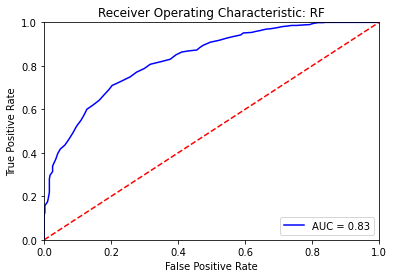

In [60]:
# calculate the fpr and tpr for all thresholds of the classification
probs =rf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC curve

plt.title('Receiver Operating Characteristic: RF')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

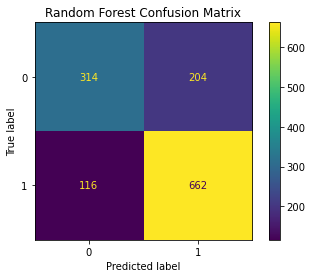

In [61]:
# Plot the confusion matrix

plot_confusion_matrix(rf, X_test, y_test) 
plt.title("Random Forest Confusion Matrix")
plt.show() 

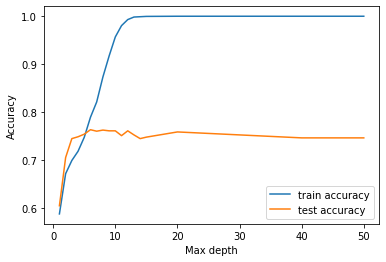

In [62]:
train_errors = []
valid_errors = []
param_range = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,20,30,40,50]

for max_depth in param_range:
    random_forest = RandomForestClassifier(max_depth=max_depth, n_estimators=100, random_state=42)
    random_forest.fit(X_train, y_train.values.ravel())
    
    train_errors.append(metrics.accuracy_score(y_train.values.ravel(), random_forest.predict(X_train)))
    valid_errors.append(metrics.accuracy_score(y_test.values.ravel(), random_forest.predict(X_test)))
    

plt.xlabel('Max depth')
plt.ylabel('Accuracy')
plt.plot(param_range, train_errors, label="train accuracy")
plt.plot(param_range, valid_errors, label="test accuracy")
plt.legend()
plt.show()

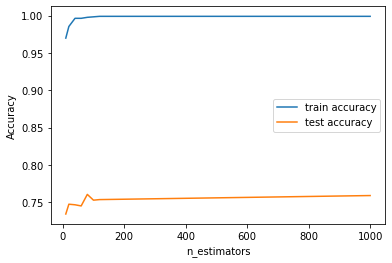

In [63]:
train_errors = []
valid_errors = []
param_range = [10,20,40,60,80,100,120,1000]

for n_estimators in param_range:
    random_forest = RandomForestClassifier(max_depth=13, n_estimators=n_estimators, random_state=42)
    random_forest.fit(X_train, y_train.values.ravel())
    
    train_errors.append(metrics.accuracy_score(y_train.values.ravel(), random_forest.predict(X_train)))
    valid_errors.append(metrics.accuracy_score(y_test.values.ravel(), random_forest.predict(X_test)))
    

plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.plot(param_range, train_errors, label="train accuracy")
plt.plot(param_range, valid_errors, label="test accuracy")
plt.legend()
plt.show()

In [64]:
# Initialize a random forest to perform hyperparameter grid search

rf = RandomForestClassifier(random_state = 42)

In [65]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 1000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 50, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 20]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 6, 8]

# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 6, 11, 16, 21, 26, 30, 35, 40, 45, 50, None], 'min_samples_split': [2, 5, 10, 20], 'min_samples_leaf': [1, 2, 4, 6, 8], 'bootstrap': [True, False]}


In [66]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)# Fit the random search model
rf_random.fit(X_train, y_train.values.ravel())

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 6, 11, 16, 21, 26, 30,
                                                      35, 40, 45, 50, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 20],
                                        'n_estimators': [10, 120, 230, 340, 450,
                                                         560, 670, 780, 890,
                                                         1000]},
                   random_state=42, verbose=2)

In [67]:
# Get the best random forrest hyperparameters
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 21,
 'bootstrap': False}

In [72]:
rf1 = RandomForestClassifier(n_estimators=450,
 min_samples_split= 5,
 min_samples_leaf= 6,
 max_features= 'auto',
 max_depth= 21,
 bootstrap= False) # max_depth = 10, criterion = "gini", bootstrap=False)
rf1.fit(X_train,y_train.values.ravel())

y_pred_rf = rf1.predict(X_test)

In [73]:
print("Random Forest Accuracy:",metrics.accuracy_score(y_test, y_pred_rf))

Random Forest Accuracy: 0.7515432098765432


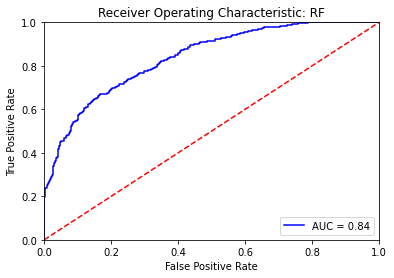

In [74]:
# calculate the fpr and tpr for all thresholds of the classification
probs =rf1.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

#plt
plt.title('Receiver Operating Characteristic: RF')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

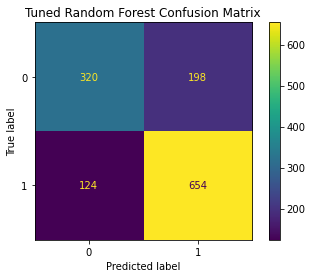

In [75]:
plot_confusion_matrix(rf1, X_test, y_test)  
plt.title("Tuned Random Forest Confusion Matrix")
plt.show()  

In [76]:
xgb = XGBClassifier(booster='gbtree', random_state=42,learning_rate=0.05) 
xgb.fit(X_train, y_train.values.ravel())
xgb.score(X_test,y_test)

y_pred_xgb = xgb.predict(X_test)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:37:51] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [77]:
print("XGB Accuracy:",metrics.accuracy_score(y_test, y_pred_xgb))

XGB Accuracy: 0.7229938271604939


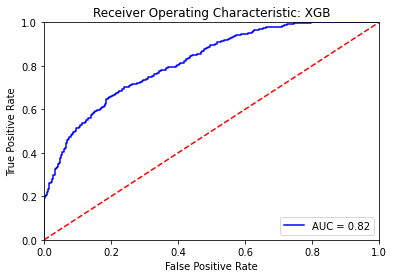

In [78]:
# calculate the fpr and tpr for all thresholds of the classification
probs = xgb.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# plt
plt.title('Receiver Operating Characteristic: XGB')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

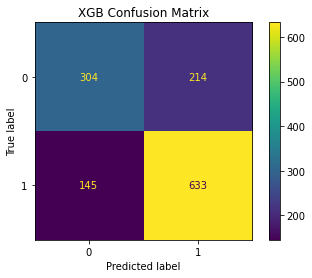

In [79]:
plot_confusion_matrix(xgb, X_test, y_test)  
plt.title("XGB Confusion Matrix")
plt.show()  